In [54]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

input_file = "/Users/szymontrochimiak/Library/CloudStorage/CloudMounter-SzymonTrochimiak/Nauka/PW/MINI/Data Processing in R and Python/Data/solana.stackexchange.com/Posts.xml"

In [55]:
df_posts = pd.read_xml(input_file)

In [56]:
df_posts

,Id,PostTypeId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastEditorUserId,LastEditDate,...,Title,Tags,AnswerCount,CommentCount,ClosedDate,ContentLicense,ParentId,OwnerDisplayName,FavoriteCount,CommunityOwnedDate
0,1,1,9.0,2022-07-12T21:19:27.727,6,161.0,<p>Is there any information on when dev handse...,10.0,36.0,2022-07-14T12:55:41.380,...,Solana Mobile Dev,<mobile><wallet>,2.0,0,2022-07-13T08:09:10.470,CC BY-SA 4.0,NaN,None,NaN,None
1,2,2,NaN,2022-07-12T21:24:26.677,1,NaN,<p>i believe the earliest would be ‘23 accordi...,29.0,NaN,None,...,None,None,NaN,0,None,CC BY-SA 4.0,1.0,None,NaN,None
2,3,1,NaN,2022-07-12T21:26:50.640,13,271.0,<p>does someone know how to buy Solana Nfts fr...,28.0,36.0,2022-07-22T13:03:21.237,...,Buying on Magiceden through coding,<magiceden><nfts><python>,3.0,0,None,CC BY-SA 4.0,NaN,None,NaN,None
3,4,1,NaN,2022-07-12T21:28:10.800,10,322.0,"<p>It used to be solana <a href=""https://githu...",27.0,27.0,2022-07-27T04:49:17.547,...,"How do you get token symbols, name, images, an...",<metaplex><spl-token>,2.0,4,None,CC BY-SA 4.0,NaN,None,NaN,None
4,5,2,NaN,2022-07-12T21:38:59.350,12,NaN,<p>you'd just have to create a script that can...,20.0,NaN,None,...,None,None,NaN,3,None,CC BY-SA 4.0,3.0,None,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7433,8258,1,NaN,2023-12-02T15:37:58.280,0,6.0,<p>The build fails due to error</p>\n<pre><cod...,4972.0,NaN,None,...,Rust build fails - cannot find libssl.so,<anchor><solana-program><cargo><build-bpf><bui...,1.0,0,None,CC BY-SA 4.0,NaN,None,NaN,None
7434,8259,2,NaN,2023-12-02T15:37:58.280,0,NaN,"<p>This issue is discussed <a href=""https://gi...",4972.0,NaN,None,...,None,None,NaN,0,None,CC BY-SA 4.0,8258.0,None,NaN,None
7435,8260,1,NaN,2023-12-02T16:36:49.793,0,16.0,<p>I am trying to write a function in Anchor (...,4469.0,NaN,None,...,How to check owner of cNFT given asset id?,<anchor><solana-program><compression><cnft>,1.0,0,None,CC BY-SA 4.0,NaN,None,NaN,None
7436,8261,1,NaN,2023-12-02T20:33:50.260,0,4.0,<p>I'm attempting to transfer SPL tokens using...,6661.0,NaN,None,...,transfer SPL Tokens? what wrong?,<web3.js><spl-token>,0.0,0,None,CC BY-SA 4.0,NaN,None,NaN,None


In [57]:
df_posts["CreationDate"] = pd.to_datetime(df_posts["CreationDate"])
df_posts["LastActivityDate"] = pd.to_datetime(df_posts["LastActivityDate"])
df_posts["LastEditDate"] = pd.to_datetime(df_posts["LastEditDate"])
df_posts["ClosedDate"] = pd.to_datetime(df_posts["ClosedDate"])
df_posts["CommunityOwnedDate"] = pd.to_datetime(df_posts["CommunityOwnedDate"])

In [58]:
solana_price = "/Users/szymontrochimiak/Documents/gts/dprpy_assignment_3/historical_prices/SOL-USD.csv"
df_solana = pd.read_csv(solana_price)
df_solana["Price"] = (df_solana["Close"] + df_solana["Open"]) / 2

In [59]:
df_solana

,Date,Open,High,Low,Close,Adj Close,Volume,Price
0,2020-04-10,0.832005,1.313487,0.694187,0.951054,0.951054,87364276,0.891529
1,2020-04-11,0.951054,1.049073,0.765020,0.776819,0.776819,43862444,0.863936
2,2020-04-12,0.785448,0.956670,0.762426,0.882507,0.882507,38736897,0.833978
3,2020-04-13,0.890760,0.891603,0.773976,0.777832,0.777832,18211285,0.834296
4,2020-04-14,0.777832,0.796472,0.628169,0.661925,0.661925,16747614,0.719878
...,...,...,...,...,...,...,...,...
1375,2024-01-15,94.036545,96.821236,93.241112,94.490227,94.490227,1755858499,94.263386
1376,2024-01-16,94.438347,98.595306,94.396683,97.626915,97.626915,1806576879,96.032631
1377,2024-01-17,97.615807,102.433739,97.055161,102.063599,102.063599,3220344763,99.839703
1378,2024-01-18,102.029495,102.923141,92.140579,94.250954,94.250954,2684524713,98.140224


In [60]:
df_solana["Date"] = pd.to_datetime(df_solana["Date"])
df_solana["Date"] = df_solana["Date"].dt.tz_localize(None)
df_solana.index = df_solana["Date"]
del df_solana["Date"]

In [61]:
# limit timeframe
df_posts = df_posts[df_posts["CreationDate"] >= datetime.datetime.fromisoformat("2022-08-01")][df_posts["CreationDate"] <= datetime.datetime.fromisoformat("2023-06-01")]
df_solana = df_solana[datetime.datetime.fromisoformat("2022-08-01"):datetime.datetime.fromisoformat("2023-06-01")]

/var/folders/v3/x_ps6wr13g52vv22zxx8c_fr0000gn/T/ipykernel_2568/67267636.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_posts = df_posts[df_posts["CreationDate"] >= datetime.datetime.fromisoformat("2022-08-01")][df_posts["CreationDate"] <= datetime.datetime.fromisoformat("2023-06-01")]


In [62]:
questions = df_posts[df_posts["PostTypeId"]==1]
answers = df_posts[df_posts["PostTypeId"]==2]

## Proportion of answers to questions

<Axes: xlabel='CreationDate'>

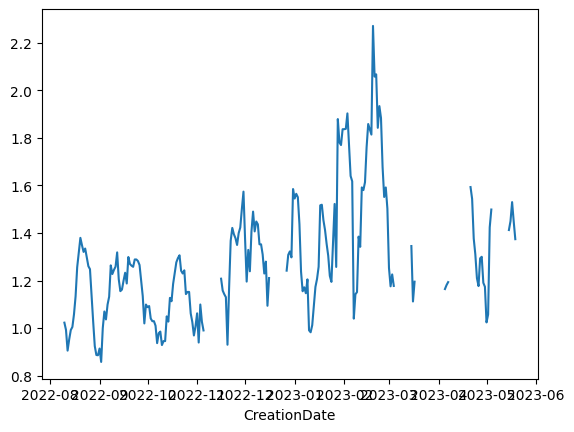

In [63]:
(answers.groupby(df_posts["CreationDate"].dt.date).size() / questions.groupby(df_posts["CreationDate"].dt.date).size()).rolling(window=10).mean().plot()
#answers.groupby(df_posts["CreationDate"].dt.date).size().rolling(window=10).mean().plot()

## posts to solana

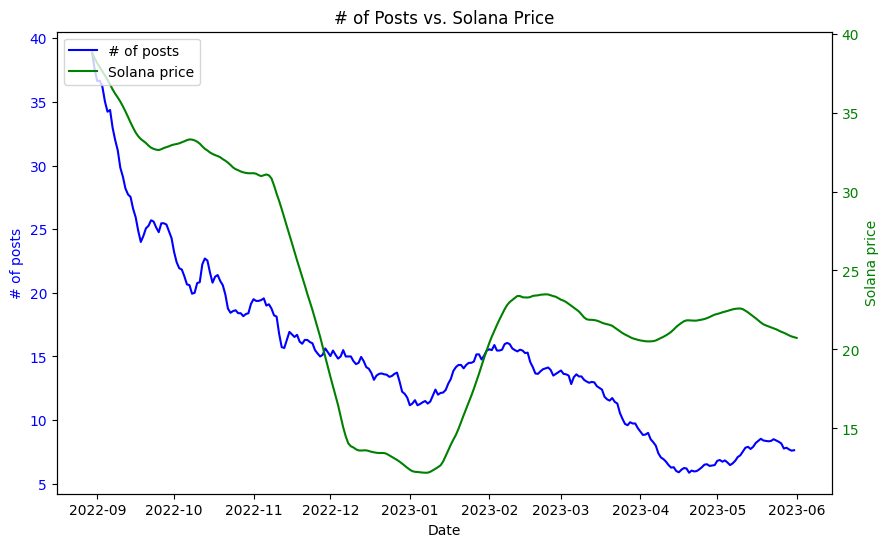

In [65]:
series1 = df_posts.groupby(df_posts["CreationDate"].dt.date).size().rolling(window=30).mean()
series2 = df_solana["Price"].rolling(window=30).mean()

color_palet = ("blue", "green")
title = '# of Posts vs. Solana Price'
ax_title = ('# of posts', 'Solana price')
path = "/Users/szymontrochimiak/Downloads/solana_price.png"

# Create plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot number of posts on primary y-axis
line1, = ax1.plot(series1, color=color_palet[0], label=ax_title[0])
ax1.set_xlabel('Date')
ax1.set_ylabel(ax_title[0], color=color_palet[0])
ax1.tick_params(axis='y', labelcolor=color_palet[0])

# Create a second y-axis for Bitcoin price
ax2 = ax1.twinx()
line2, = ax2.plot(series2, color=color_palet[1], label=ax_title[1])
ax2.set_ylabel(ax_title[1], color=color_palet[1])  
ax2.tick_params(axis='y', labelcolor=color_palet[1])

# Create combined legend
plt.legend([line1, line2], ax_title, loc='upper left')

# Title
plt.title(title)

plt.savefig(path)

# Show plot
plt.show()

<Axes: >

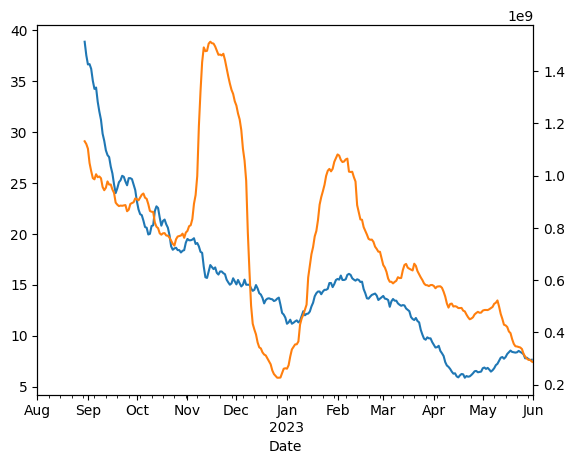

In [66]:
ax = df_posts.groupby(df_posts["CreationDate"].dt.date).size().rolling(window=30).mean().plot()
df_solana["Volume"].rolling(window=30).mean().plot(ax=ax, secondary_y=True)

## Add column which indicates if post has "buy" and "sell" word

<Axes: xlabel='CreationDate'>

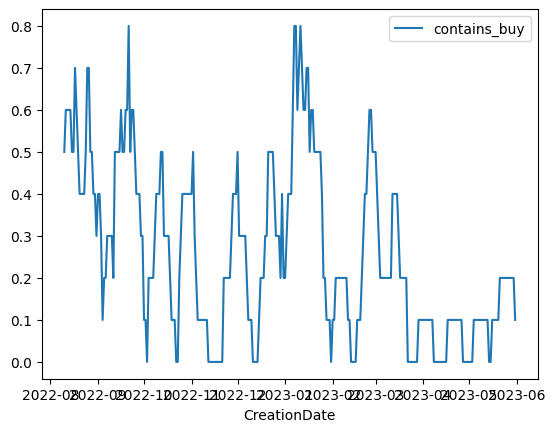

In [67]:
df_posts['contains_buy'] = df_posts['Body'].str.contains('buy', case=False, na=False)
df_posts.groupby(df_posts["CreationDate"].dt.date).agg({'contains_buy': 'sum'}).rolling(window=10).mean().plot()

<Axes: xlabel='CreationDate'>

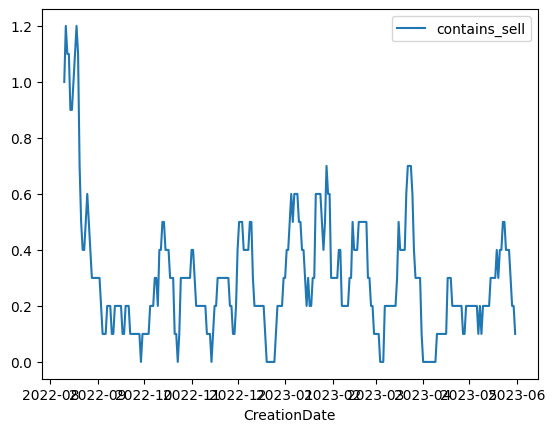

In [68]:
df_posts['contains_sell'] = df_posts['Body'].str.contains('sell', case=False, na=False)
df_posts.groupby(df_posts["CreationDate"].dt.date).agg({'contains_sell': 'sum'}).rolling(window=10).mean().plot()

In [69]:
date_range = pd.date_range(start=datetime.datetime.fromisoformat("2022-08-01"), end=datetime.datetime.fromisoformat("2023-06-01"), freq='D')

buy = df_posts.groupby(df_posts["CreationDate"].dt.date).agg({'contains_buy': 'sum'}).reindex(date_range).fillna(0).replace([np.inf, -np.inf], 0)
sell = df_posts.groupby(df_posts["CreationDate"].dt.date).agg({'contains_sell': 'sum'}).reindex(date_range).fillna(0).replace([np.inf, -np.inf], 0)
all_posts = df_posts.groupby(df_posts["CreationDate"].dt.date).size().reindex(date_range).fillna(0).replace([np.inf, -np.inf], 0)

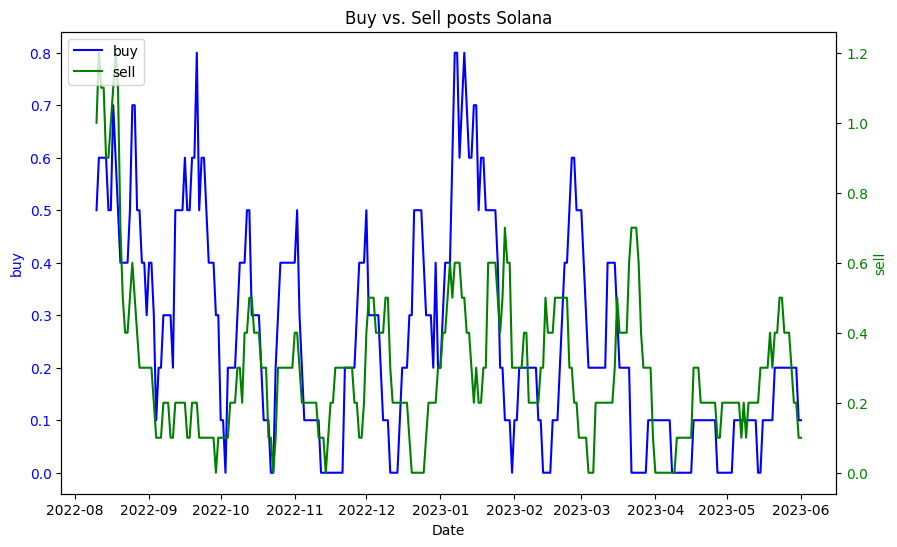

In [70]:
series1 = buy.rolling(window=10).mean()
series2 = sell.rolling(window=10).mean()

color_palet = ("blue", "green")
title = 'Buy vs. Sell posts Solana'
ax_title = ('buy', 'sell')
path = "/Users/szymontrochimiak/Downloads/solana_buy_sell.png"

# Create plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot number of posts on primary y-axis
line1, = ax1.plot(series1, color=color_palet[0], label=ax_title[0])
ax1.set_xlabel('Date')
ax1.set_ylabel(ax_title[0], color=color_palet[0])
ax1.tick_params(axis='y', labelcolor=color_palet[0])

# Create a second y-axis for Bitcoin price
ax2 = ax1.twinx()
line2, = ax2.plot(series2, color=color_palet[1], label=ax_title[1])
ax2.set_ylabel(ax_title[1], color=color_palet[1])  
ax2.tick_params(axis='y', labelcolor=color_palet[1])

# Create combined legend
plt.legend([line1, line2], ax_title, loc='upper left')

# Title
plt.title(title)

plt.savefig(path)

# Show plot
plt.show()

## Correlations

In [71]:
from scipy.signal import correlate
import matplotlib.pyplot as plt
import numpy as np

def calculate_correlation(signal1, signal2):
    norm_signal1 = (signal1 - np.mean(signal1)) / np.std(signal1)
    norm_signal2 = (signal2 - np.mean(signal2)) / np.std(signal2)
    
    xcorr = correlate(norm_signal1, norm_signal2, mode='full', method='auto') / len(signal1)
    plt.plot(xcorr)
    plt.show()
    
    # The shift is determined by the index of the maximum correlation
    max_corr_index = np.argmax(xcorr)
    shift = max_corr_index - (len(signal1) - 1)
    return shift, np.max(xcorr)

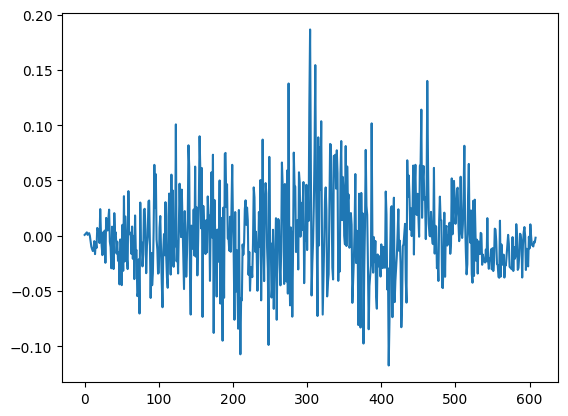

(0, 0.1866053832903756)

In [72]:
calculate_correlation(buy["contains_buy"], sell["contains_sell"])

No correlation

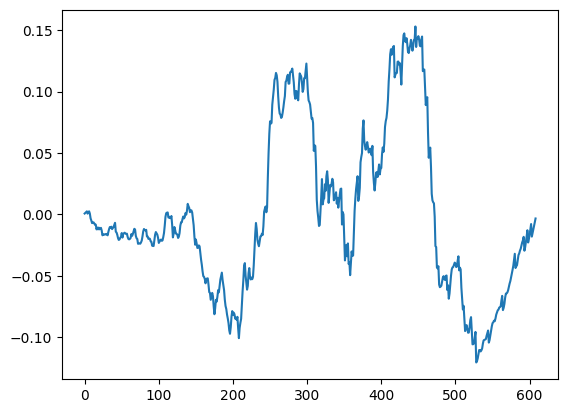

(142, 0.15305424171198911)

In [73]:
calculate_correlation(buy["contains_buy"], df_solana["Price"])

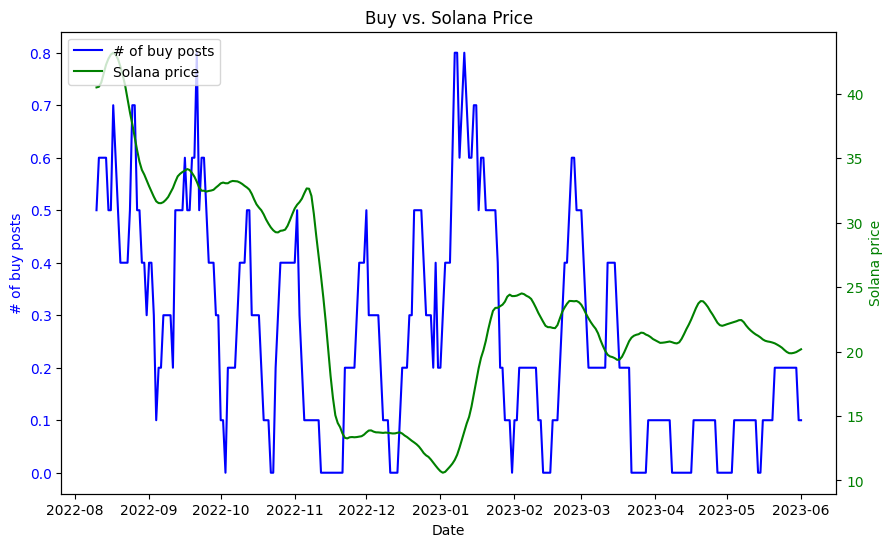

In [75]:
series1 = buy["contains_buy"].rolling(window=10).mean()
series2 = df_solana["Price"].rolling(window=10).mean()

color_palet = ("blue", "green")
title = 'Buy vs. Solana Price'
ax_title = ('# of buy posts', 'Solana price')
path = "/Users/szymontrochimiak/Downloads/solana_buy_price.png"

# Create plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot number of posts on primary y-axis
line1, = ax1.plot(series1, color=color_palet[0], label=ax_title[0])
ax1.set_xlabel('Date')
ax1.set_ylabel(ax_title[0], color=color_palet[0])
ax1.tick_params(axis='y', labelcolor=color_palet[0])

# Create a second y-axis for Bitcoin price
ax2 = ax1.twinx()
line2, = ax2.plot(series2, color=color_palet[1], label=ax_title[1])
ax2.set_ylabel(ax_title[1], color=color_palet[1])  
ax2.tick_params(axis='y', labelcolor=color_palet[1])

# Create combined legend
plt.legend([line1, line2], ax_title, loc='upper left')

# Title
plt.title(title)

plt.savefig(path)

# Show plot
plt.show()

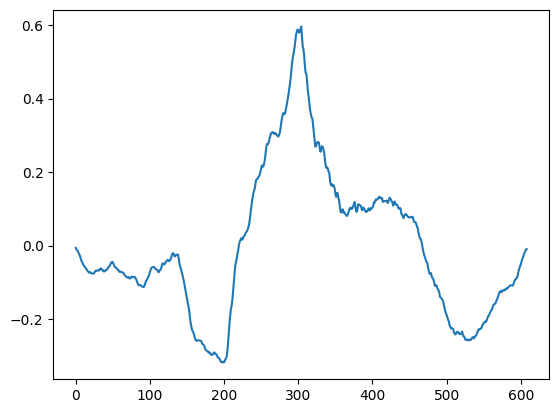

(0, 0.5963772768594066)

In [76]:
calculate_correlation(all_posts, df_solana["Price"])

Strong correlation but no shift

<Axes: >

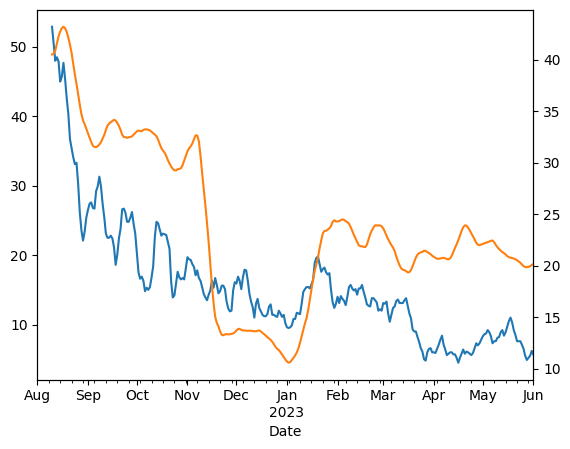

In [77]:
ax = all_posts.rolling(window=10).mean().plot()
df_solana["Price"].rolling(window=10).mean().plot(ax=ax, secondary_y=True)

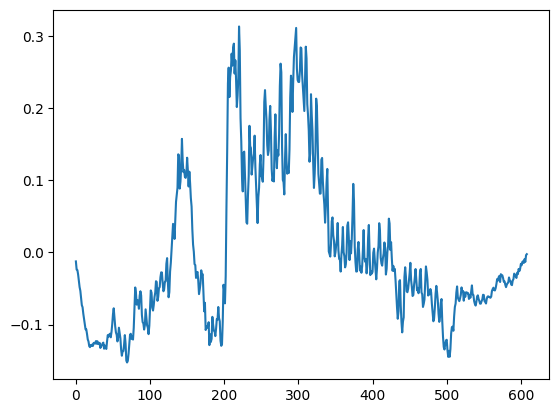

(-84, 0.3132305441691122)

In [78]:
calculate_correlation(all_posts, df_solana["Volume"])

## Correlation of buy-sell with bitcoin price

<Axes: >

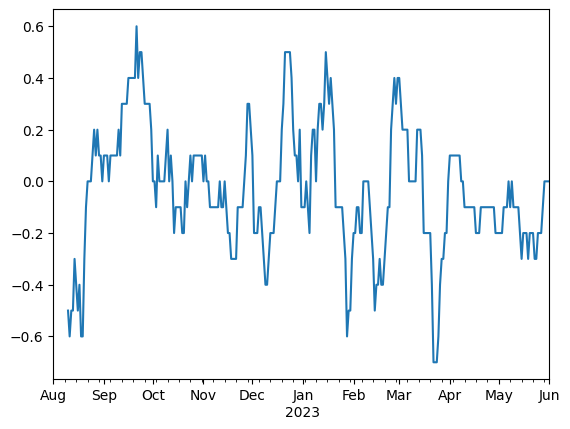

In [79]:
(buy["contains_buy"]-sell["contains_sell"]).rolling(window=10).mean().plot()

/var/folders/v3/x_ps6wr13g52vv22zxx8c_fr0000gn/T/ipykernel_2568/3426719905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_solana["price_diff"] = (df_solana["Price"].diff() / df_solana["Price"]).fillna(0)


<Axes: xlabel='Date'>

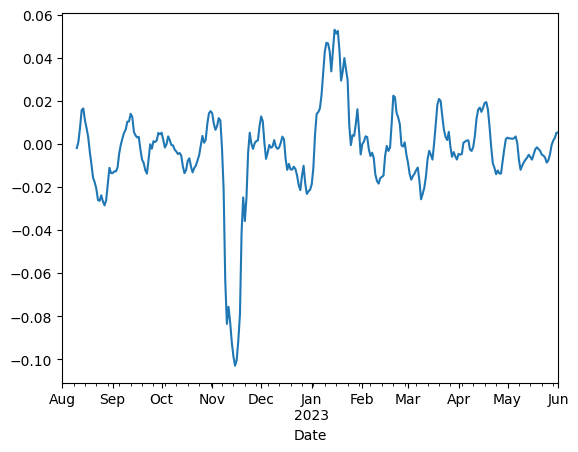

In [80]:
# calculate difference in bitcoin price and normalize based on day price
df_solana["price_diff"] = (df_solana["Price"].diff() / df_solana["Price"]).fillna(0)
df_solana["price_diff"].rolling(window=10).mean().plot()

In [81]:
len((buy["contains_buy"]-sell["contains_sell"])), len(df_solana["price_diff"])

(305, 305)

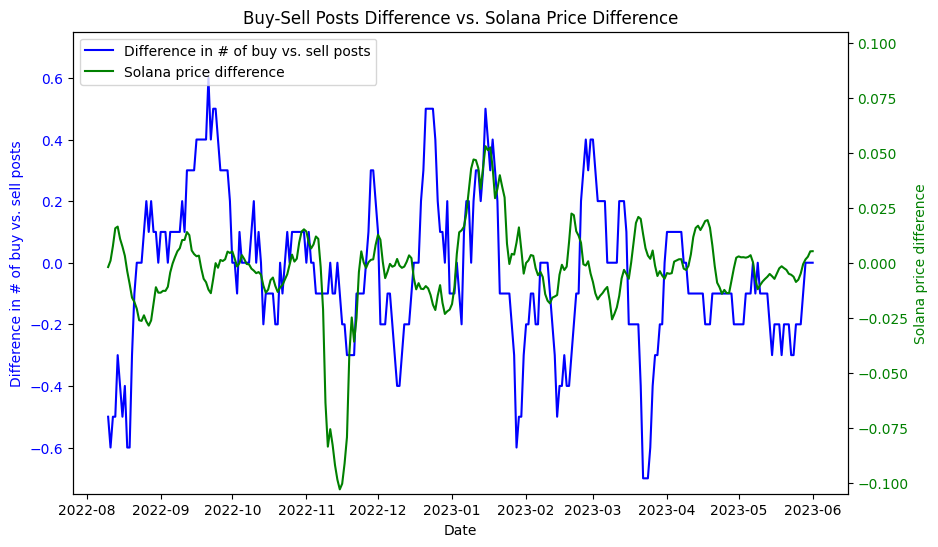

In [87]:
series1 = (buy["contains_buy"]-sell["contains_sell"]).rolling(window=10).mean()
series2 = df_solana["price_diff"].rolling(window=10).mean()

color_palet = ("blue", "green")
title = 'Buy-Sell Posts Difference vs. Solana Price Difference'
ax_title = ('Difference in # of buy vs. sell posts', 'Solana price difference')
path = "/Users/szymontrochimiak/Downloads/solana_buy_sell_price_diff.png"

# Create plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot number of posts on primary y-axis
line1, = ax1.plot(series1, color=color_palet[0], label=ax_title[0])
ax1.set_xlabel('Date')
ax1.set_ylim([-0.75, 0.75])
ax1.set_ylabel(ax_title[0], color=color_palet[0])
ax1.tick_params(axis='y', labelcolor=color_palet[0])

# Create a second y-axis for Bitcoin price
ax2 = ax1.twinx()
line2, = ax2.plot(series2, color=color_palet[1], label=ax_title[1])
ax2.set_ylim([-0.105, 0.105])
ax2.set_ylabel(ax_title[1], color=color_palet[1])  
ax2.tick_params(axis='y', labelcolor=color_palet[1])

# Create combined legend
plt.legend([line1, line2], ax_title, loc='upper left')

# Title
plt.title(title)

plt.savefig(path)

# Show plot
plt.show()

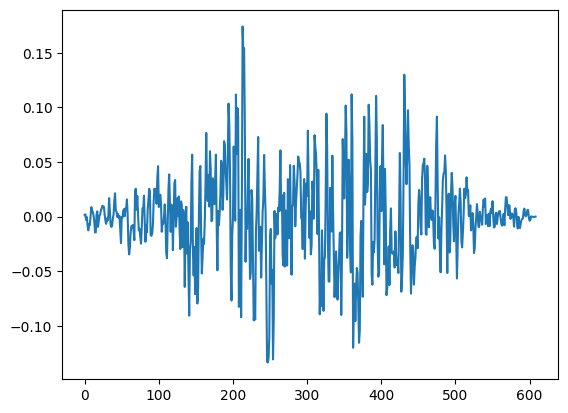

(-91, 0.1741335468408787)

In [88]:
calculate_correlation(buy["contains_buy"] - sell["contains_sell"], df_solana["price_diff"])

### Get only gaining days

In [89]:
# select only gaining days, the rest set to 0
df_bitcoin_gaining = df_solana.copy()
df_bitcoin_gaining[df_bitcoin_gaining["price_diff"] < 0] = 0
df_bitcoin_gaining

,Open,High,Low,Close,Adj Close,Volume,Price,price_diff
Date,,,,,,,,
2022-08-01,42.401554,43.116291,40.736763,41.786484,41.786484,1082119921,42.094019,0.000000
2022-08-02,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000
2022-08-03,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000
2022-08-04,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000
2022-08-05,38.823994,41.174652,38.795719,40.561031,40.561031,1198859111,39.692512,0.025316
...,...,...,...,...,...,...,...,...
2023-05-28,20.426081,21.150990,20.336889,20.798578,20.798578,291460886,20.612330,0.034767
2023-05-29,20.800047,20.970686,20.297682,20.586510,20.586510,228295637,20.693278,0.003912
2023-05-30,20.587137,21.381718,20.519501,21.254084,21.254084,367512387,20.920610,0.010866


<Axes: >

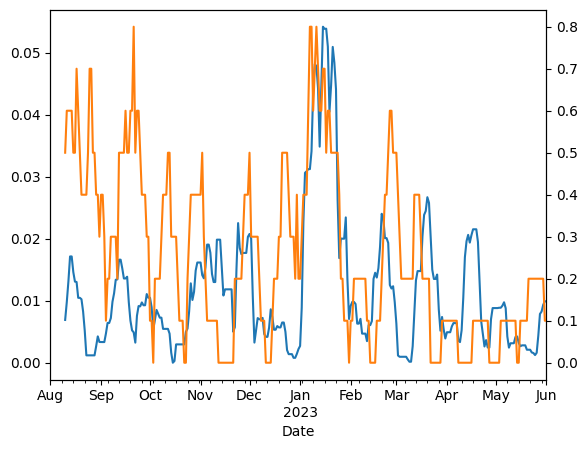

In [90]:
ax = df_bitcoin_gaining["price_diff"].rolling(window=10).mean().plot()
buy["contains_buy"].rolling(window=10).mean().plot(ax=ax, secondary_y=True)

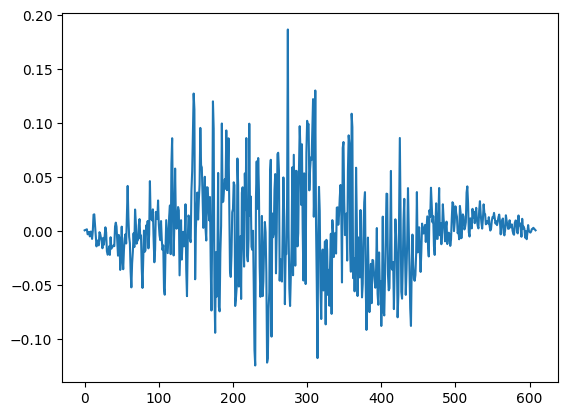

(-30, 0.1869257702784574)

In [91]:
calculate_correlation(buy["contains_buy"], df_bitcoin_gaining["price_diff"])

Pretty weak correlation

### Get only loosing days

In [92]:
# select only gaining days, the rest set to 0
df_bitcoin_loosing = df_solana.copy()
df_bitcoin_loosing[df_bitcoin_loosing["price_diff"] > 0] = 0
df_bitcoin_loosing["price_diff"] *= -1
df_bitcoin_loosing

,Open,High,Low,Close,Adj Close,Volume,Price,price_diff
Date,,,,,,,,
2022-08-01,42.401554,43.116291,40.736763,41.786484,41.786484,1082119921,42.094019,-0.000000
2022-08-02,41.774147,42.332111,39.747120,39.754505,39.754505,1205226999,40.764326,0.032619
2022-08-03,39.754864,40.730652,37.893131,38.544418,38.544418,2312325350,39.149641,0.041244
2022-08-04,38.544640,39.679878,38.044727,38.830673,38.830673,1235137178,38.687657,0.011941
2022-08-05,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,-0.000000
...,...,...,...,...,...,...,...,...
2023-05-28,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,-0.000000
2023-05-29,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,-0.000000
2023-05-30,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,-0.000000


<Axes: >

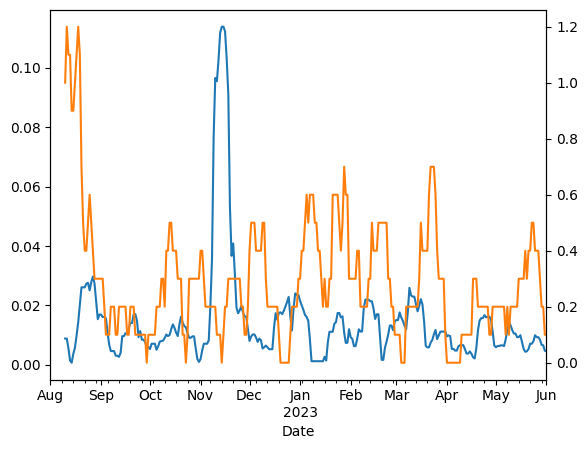

In [93]:
ax = df_bitcoin_loosing["price_diff"].rolling(window=10).mean().plot()
sell["contains_sell"].rolling(window=10).mean().plot(ax=ax, secondary_y=True)

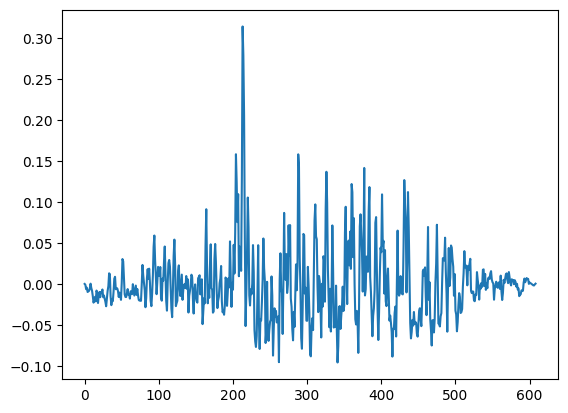

(-91, 0.31381500619697)

In [94]:
calculate_correlation(sell["contains_sell"], df_bitcoin_loosing["price_diff"])

Pretty weak correlation

## Volume correlation

<Axes: xlabel='Date'>

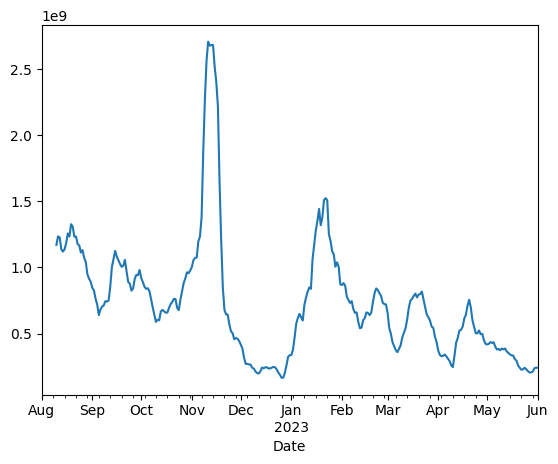

In [95]:
df_solana["Volume"].rolling(window=10).mean().plot()

/var/folders/v3/x_ps6wr13g52vv22zxx8c_fr0000gn/T/ipykernel_2568/1755452597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_solana["volume_diff"] = (df_solana["Volume"].diff() / df_solana["Volume"]).fillna(0).replace([np.inf, -np.inf], 0)


<Axes: xlabel='Date'>

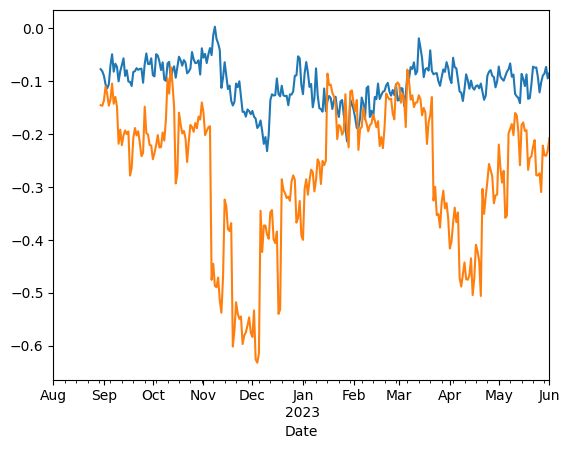

In [96]:
df_solana["volume_diff"] = (df_solana["Volume"].diff() / df_solana["Volume"]).fillna(0).replace([np.inf, -np.inf], 0)
ax = df_solana["volume_diff"].rolling(window=30).mean().plot()

all_posts_diff = (all_posts.diff() / all_posts).fillna(0).replace([np.inf, -np.inf], 0)
all_posts_diff.rolling(window=30).mean().plot(ax=ax)

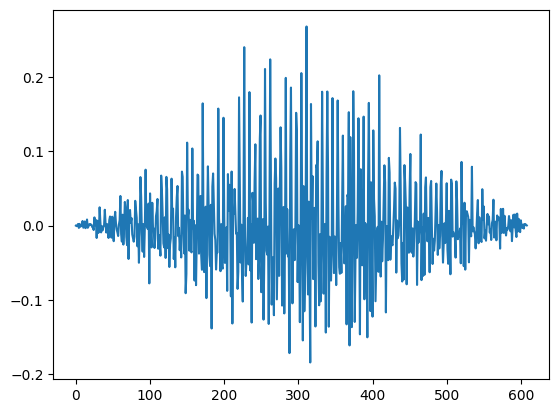

(7, 0.2676559093888967)

In [97]:
calculate_correlation(all_posts_diff, df_solana["volume_diff"])

weak correlation

## Examine only small part

In [99]:
start_date = datetime.date.fromisoformat("2023-01-01")
end_date = datetime.date.fromisoformat("2023-06-01")
buy.loc[start_date:end_date]

,contains_buy
2023-01-01,0.0
2023-01-02,1.0
2023-01-03,1.0
2023-01-04,0.0
2023-01-05,0.0
...,...
2023-05-28,0.0
2023-05-29,0.0
2023-05-30,0.0
2023-05-31,0.0


<Axes: >

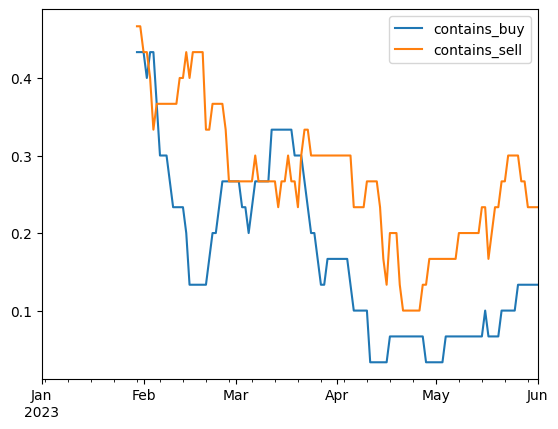

In [100]:
ax = buy.loc[start_date:end_date].rolling(window=30).mean().plot()
sell.loc[start_date:end_date].rolling(window=30).mean().plot(ax=ax)

<Axes: >

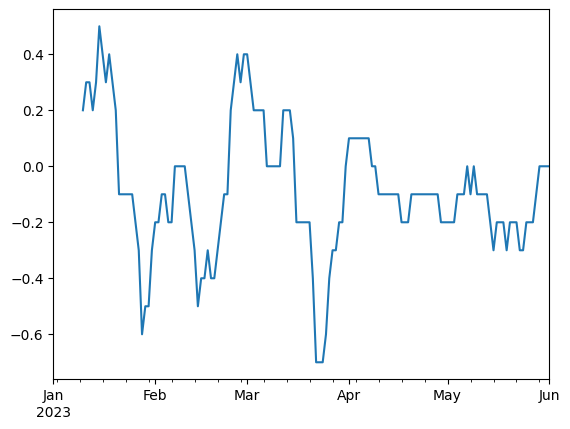

In [47]:
(buy["contains_buy"]-sell["contains_sell"])[start_date:end_date].rolling(window=10).mean().plot()

<Axes: xlabel='Date'>

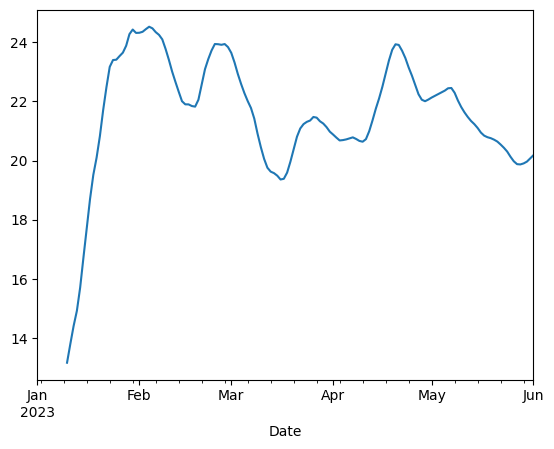

In [48]:
df_solana.loc[start_date:end_date]["Price"].rolling(window=10).mean().plot()

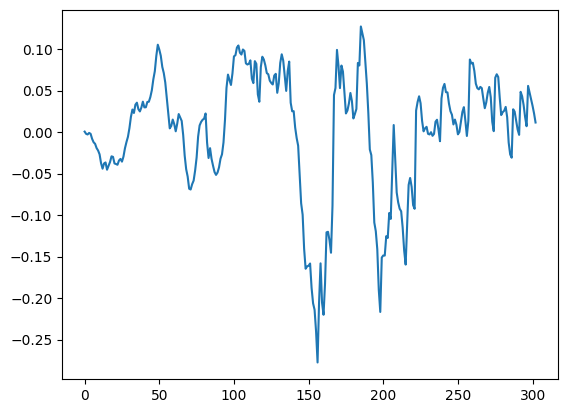

(34, 0.12731588887425316)

In [49]:
calculate_correlation(buy.loc[start_date:end_date]["contains_buy"], df_solana.loc[start_date:end_date]["Price"])

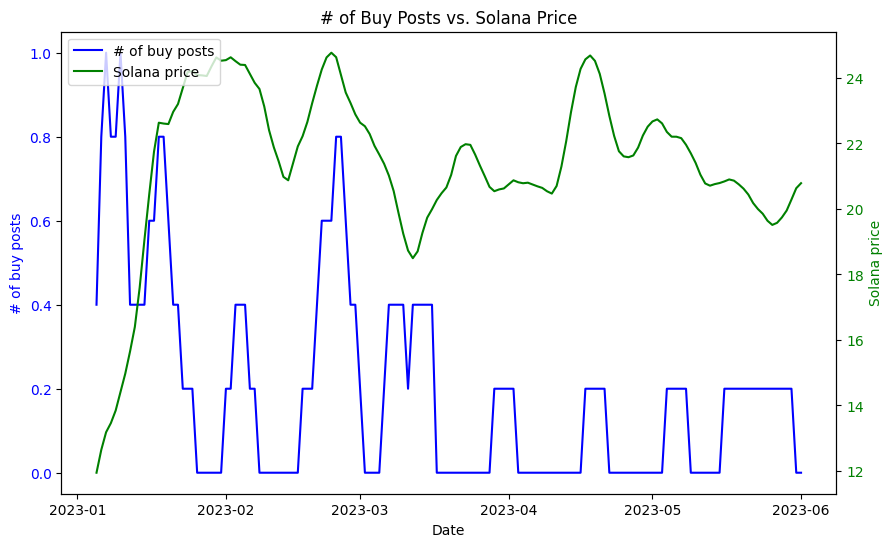

In [101]:
series1 = buy.loc[start_date:end_date]["contains_buy"].rolling(window=5).mean()
series2 = df_solana.loc[start_date:end_date]["Price"].rolling(window=5).mean()

color_palet = ("blue", "green")
title = '# of Buy Posts vs. Solana Price'
ax_title = ('# of buy posts', 'Solana price')
path = "/Users/szymontrochimiak/Downloads/solana_buy_price_small.png"

# Create plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot number of posts on primary y-axis
line1, = ax1.plot(series1, color=color_palet[0], label=ax_title[0])
ax1.set_xlabel('Date')
ax1.set_ylabel(ax_title[0], color=color_palet[0])
ax1.tick_params(axis='y', labelcolor=color_palet[0])

# Create a second y-axis for Bitcoin price
ax2 = ax1.twinx()
line2, = ax2.plot(series2, color=color_palet[1], label=ax_title[1])
ax2.set_ylabel(ax_title[1], color=color_palet[1])  
ax2.tick_params(axis='y', labelcolor=color_palet[1])

# Create combined legend
plt.legend([line1, line2], ax_title, loc='upper left')

# Title
plt.title(title)

plt.savefig(path)

# Show plot
plt.show()

bad correlation

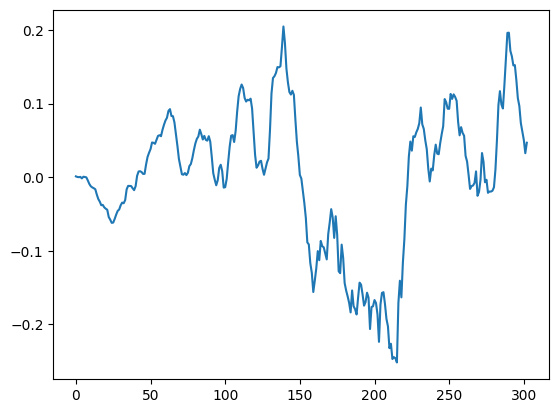

(-12, 0.20487381327197174)

In [50]:
calculate_correlation(all_posts.loc[start_date:end_date], df_solana.loc[start_date:end_date]["Price"])

no correlation

<Axes: >

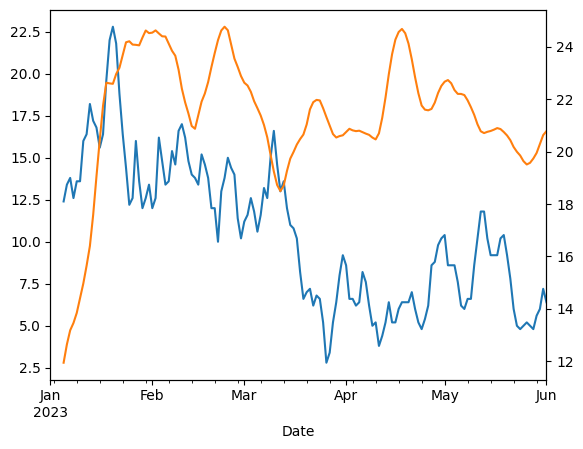

In [51]:
ax = all_posts.loc[start_date:end_date].rolling(window=5).mean().plot()
df_solana.loc[start_date:end_date]["Price"].rolling(window=5).mean().plot(ax=ax, secondary_y=True)

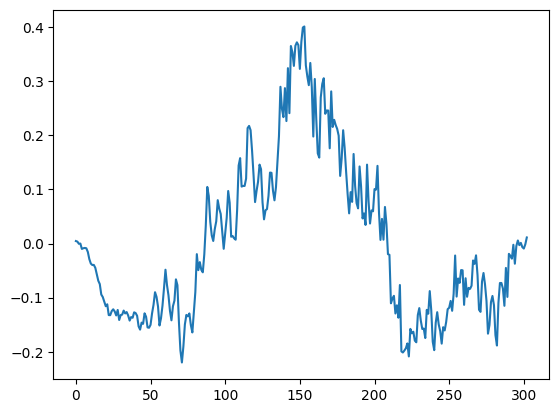

(2, 0.4012013643987925)

In [52]:
calculate_correlation(all_posts.loc[start_date:end_date], df_solana.loc[start_date:end_date]["Volume"])

<Axes: >

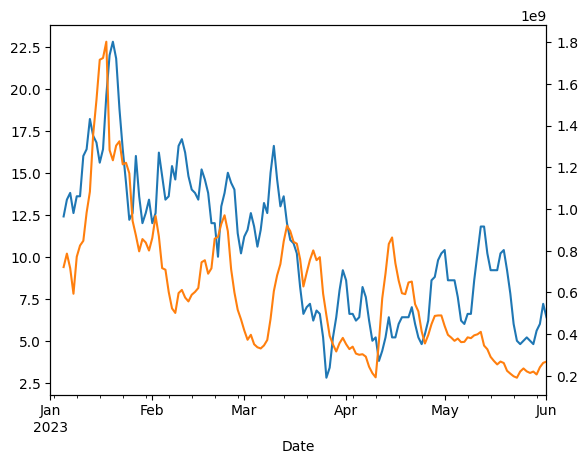

In [53]:
ax = all_posts.loc[start_date:end_date].rolling(window=5).mean().plot()
df_solana.loc[start_date:end_date]["Volume"].rolling(window=5).mean().plot(ax=ax, secondary_y=True)